In [1]:
import pandas as pd

# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('Salary_Data.csv')

In [2]:
import numpy as np

# memisahkan atribut dan label
X = data['YearsExperience']
y = data['Salary']

# mengubah bentuk atribut
X = X[:,np.newaxis]

C:\Users\Ktyptorio\AppData\Local\Temp\ipykernel_23760\3663637664.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:,np.newaxis]


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# membangun model dengan parameter C, gamma, dan kernel
model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C':     [1000, 10000, 100000, 99999],
    'gamma': [0.5, 0.05,0.005]
}
grid_search = GridSearchCV(model, parameters)

# melatih model dengan fungsi fit
grid_search.fit(X,y)

print("SVR GridSearch score: "+str(grid_search.best_score_))
print("SVR GridSearch params: ")
print(grid_search.best_params_)

SVR GridSearch score: 0.046903736229059544
SVR GridSearch params: 
{'C': 99999, 'gamma': 0.005, 'kernel': 'rbf'}


In [10]:
# membuat model SVM baru dengan parameter terbaik hasil grid search
model_baru  = SVR(C=99999, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

SVR(C=99999, gamma=0.005)

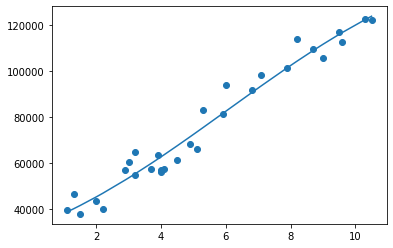

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))